<a href="https://colab.research.google.com/github/wp225/perceptron-iris/blob/main/perceptron_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
class perceptron(object):
  def __init__(self,eta=.2,n_iter=3,random_state=1):
    self.eta=eta
    self.n_iter=n_iter
    self.random_state=random_state
  
  def fit(self,X,Y):
    rgen=np.random.RandomState(self.random_state)
    self.wt=rgen.normal(loc=0,scale=0.01,size=1+X.shape[1])
    self.error=[]
    for _ in range(self.n_iter):
      error=0
      for xi,target in zip(X,Y):
        update=self.eta*(target-self.predict(xi))
        self.wt[1:]+=update*xi #normal weights 
        self.wt[0]+=update #bias
        error+=int(update!=0.0)
    return self
  
  def input(self,X):
    return np.dot(X,self.wt[1:]+self.wt[0])

  def predict(self,X):
    return np.where(self.input(X) >= 0,1,-1) #returns 1 if ip >0 else -1 




In [3]:
import os 
import pandas as pd

url=os.path.join('https://archive.ics.uci.edu', 'ml','machine-learning-databases','iris','iris.data')
df=pd.read_csv(url,header=None)

In [4]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
Y=df.iloc[0:100,4].values

In [7]:
Y=np.where(Y=='Iris-setosa',1,-1)

In [8]:
Y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [9]:
X=df.iloc[0:100,[0,2]].values
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [10]:
print(X.shape)
print(Y.shape)

(100, 2)
(100,)


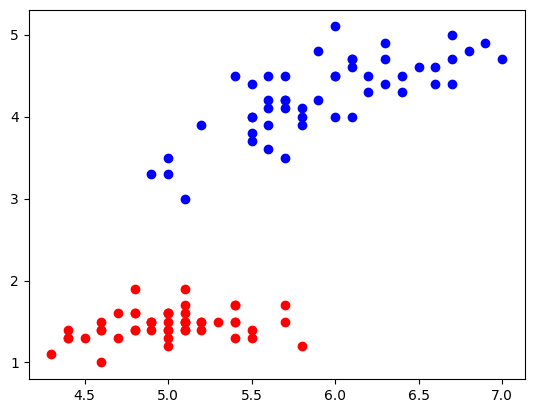

In [11]:
import matplotlib.pyplot as plt 
plt.scatter(X[:50,0],X[0:50,1],color='red')
plt.scatter(X[50:,0],X[50:,1],color='blue')
plt.show()

traning 

In [12]:
p1=perceptron(eta=.1,n_iter=3)

In [13]:
p1.fit(X,Y)

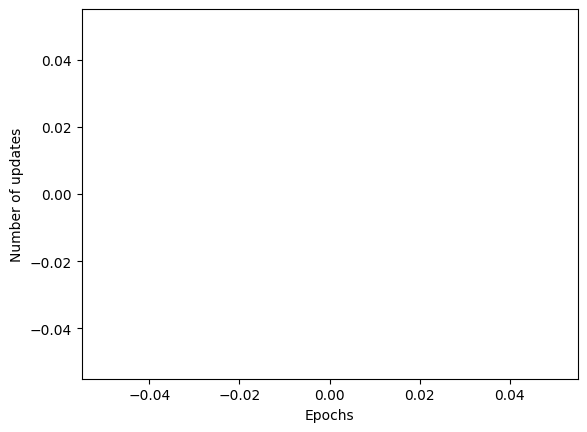

In [17]:
plt.plot(range(1, len(p1.error) + 1),p1.error, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [18]:
p1.error

[]